In [1]:
pip install roerich

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached scikit_learn-1.1.2-cp38-cp38-win_amd64.whl (7.3 MB)
  Using cached numpy-1.23.3-cp38-cp38-win_amd64.whl (14.7 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Created wheel for roerich: filename=roerich-0.4.0-py3-none-any.whl size=19969 sha256=7b2c93a24cb971b1a75a1224f2650c036dfe46fb2bee650613bd51b1043cdc39
  Stored in directory: c:\users\subhadeep\appdata\local\pip\cache\wheels\34\32\f0\ec31caf77e5ce7e63a36fe5bb2d57a7a97076136ae4190b0da
Successfully built roerich
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninsta

ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

tensorflow 2.7.0 requires h5py>=2.9.0, which is not installed.


In [9]:
pip install openpyxl==3.0.7

  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 3.0.5
    Uninstalling openpyxl-3.0.5:
      Successfully uninstalled openpyxl-3.0.5
Note: you may need to restart the kernel to use updated packages.


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
%matplotlib inline
# setting font sizeto 30
plt.rcParams.update({'font.size': 15})
import roerich

Text(0.5, 0.98, 'Actual change points in temperature (sensor 3)')

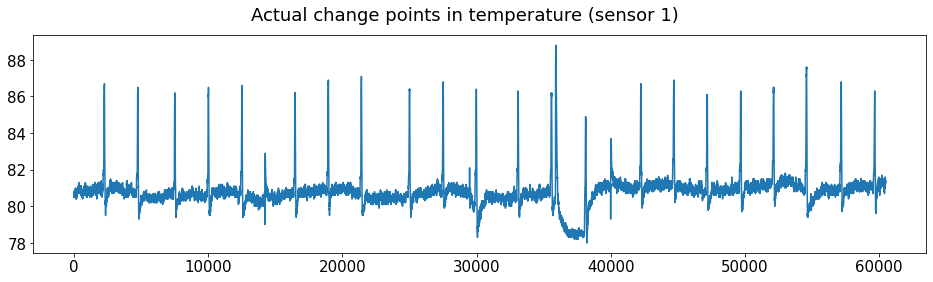

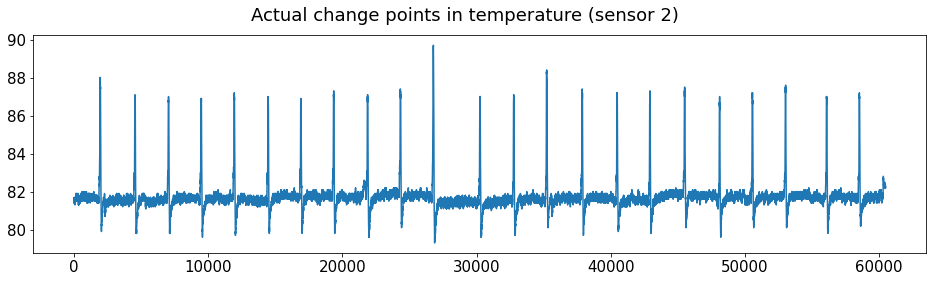

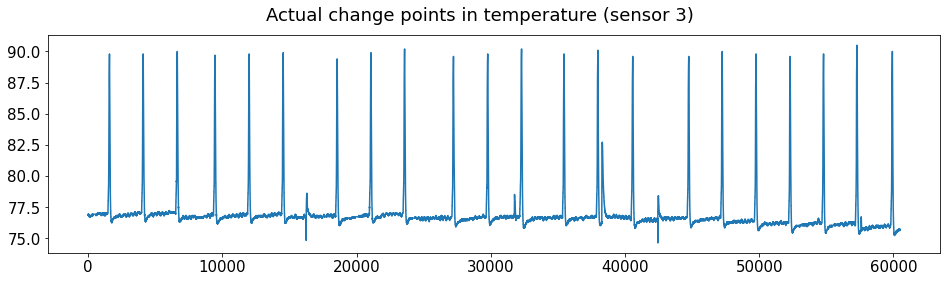

In [29]:
Temperature = pd.read_excel(r'C:\Users\Subhadeep\Documents\Datasets\Experiment 2\IoT data aggregation\Temperature.xlsx',sheet_name='Sheet1')
#Temperature1 = Temperature[0:8640] 
#Temperature1 = Temperature[0:8640] 
#Temperature3 = Temperature[17280:25920] 
#Temperature5 = Temperature[34560:43200] 
#Temperature7 = Temperature[51840:60480] 
#Temperature9 = Temperature[61920:77760] 
#Temperature11 = Temperature[86400:95040] 
#Temperature13 = Temperature[103680:112320] 
#Temperature15 = Temperature[120960:129600] 
Temperature1_week = Temperature[8640:69120] 
Temperature2_week = Temperature[69121:129600] 
Humidity = pd.read_excel(r'C:\Users\Subhadeep\Documents\Datasets\Experiment 2\IoT data aggregation\Humidity.xlsx',sheet_name='HUMIDITY')
Humidity1_week = Humidity[8640:69120] 
Humidity2_week = Humidity[69121:129600] 

Temperature_2_TOP = Temperature2_week['Top layer']
Temperature_2_BOTTOM = Temperature2_week['Below layer']
Temperature_2_MIDDLE = Temperature2_week['Middle Layer']

Humidity_2_TOP = Humidity2_week['Top layer'] 
Humidity_2_BOTTOM = Humidity2_week['Below layer']
Humidity_2_MIDDLE = Humidity2_week['Middle layer']


ts1 = []
tsA = Humidity_2_TOP
ts1 = np.append(ts1,tsA,axis=0)
plt.figure(figsize=(16,4))
plt.plot(ts1)
plt.suptitle('Actual change points in temperature (sensor 1)')

ts2 = []
tsB = Humidity_2_BOTTOM
ts2 = np.append(ts2,tsB,axis=0)   
plt.figure(figsize=(16,4))
plt.plot(ts2)
plt.suptitle('Actual change points in temperature (sensor 2)')

ts3 = []
tsC = Humidity_2_MIDDLE 
ts3 = np.append(ts3,tsC, axis=0)   
plt.figure(figsize=(16,4))
plt.plot(ts3)
plt.suptitle('Actual change points in temperature (sensor 3)')

In [17]:
ts1.size

60479

In [45]:
# take only earch 10th observation
X = Temperature1_week[['Below layer']].values[::1]

# wave arrival manually determined
cps_true = [310]

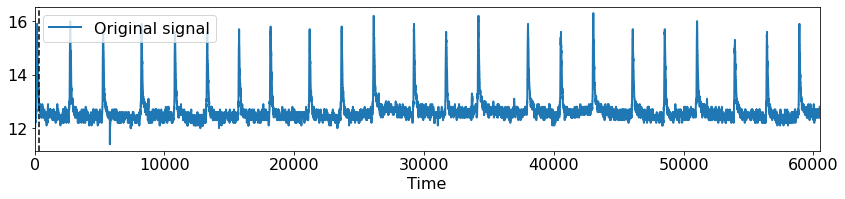

In [46]:
roerich.display(X, cps_true, score=None, cps_pred=None)

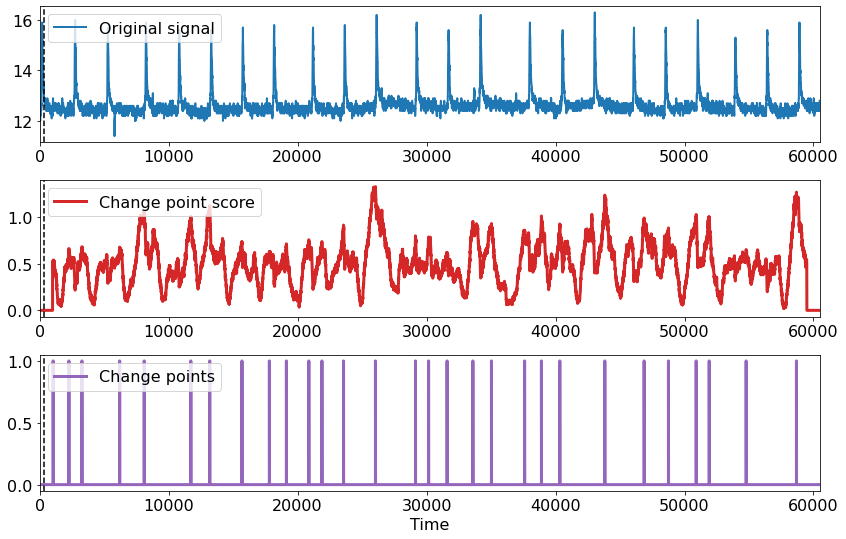

In [47]:
import roerich
from roerich.algorithms import ChangePointDetectionRuLSIF
from roerich.algorithms import GBDTRuLSIFRegressor

# generate time series
#X, cps_true = roerich.generate_dataset(period=200, N_tot=2000)

# RuLSIF regressor
reg = GBDTRuLSIFRegressor(n_estimators=30)

# change points detection
cpd = ChangePointDetectionRuLSIF(base_regressor=reg, metric='PE', periods=1,
                                 window_size=1000, step=5, n_runs=1)
score, cps_pred = cpd.predict(X)

# visualization
roerich.display(X, cps_true, score, cps_pred)

In [15]:
#accuracy
def precision_score(cps_true, cps_pred, window=20):
    """
    Calculates precision score.
    Parameters:
    -----------
    cps_true: array-like
        True indices of change points. Example: [0, 100, 200, 300].
    cps_pred: array-like
        Detected indices of change points. Example: [0, 102, 195, 298, 303].
    window: int
        Maximum allowed distance between true and predicted change points.
    Retunrs:
    --------
    precision: float
        Precision score value.
    """

    precision, recall = precision_recall_scores(cps_true, cps_pred, window=20)
    return precision


In [1]:
import numpy as np
import pandas as pd
from scipy.signal import argrelmax

def find_peaks(score, order):
    """
    Searches peaks in CPD score and estimates their heights.
    Parameters:
    -----------
    score: array-like
        Change point detection score.
    order: ind
        The number of points to the left and right of the peak to compare.
    Returns:
    --------
    cps_pred: numpy.array
        Indices of the detected change points.
    cps_score_pred: numpy.array
        Change point detection score for the detected indices of the change points.
    """

    cps_pred = argrelmax(score, order=order)[0]
    cps_score_pred = score[cps_pred]

    return cps_pred, cps_score_pred


def precision_recall_scores(cps_true, cps_pred, window=20):
    """
    Calculates precision and recall scores.
    Parameters:
    -----------
    cps_true: array-like
        True indices of change points. Example: [0, 100, 200, 300].
    cps_pred: array-like
        Detected indices of change points. Example: [0, 102, 195, 298, 303].
    window: int
        Maximum allowed distance between true and predicted change points.
    Retunrs:
    --------
    precision: float
        Precision score value.
    recall: float
        Recall score value.
    """

    cps_true = np.array(cps_true)
    cps_pred = np.array(cps_pred)

    n_cr = 0
    n_cp = len(cps_true)
    n_al = len(cps_pred)

    if n_al == 0:
        return 0, 0

    if n_cp == 0:
        return 0, 1

    is_used = []
    for atrue in cps_true:
        for apred in cps_pred:
            if (np.abs(apred - atrue) <= window) and (apred not in is_used):
                n_cr += 1
                is_used.append(apred)
                break

    tpr = n_cr / n_cp
    fpr = (n_al - n_cr) / n_al

    recall = tpr
    precision = 1 - fpr

    return precision, recall



def precision_score(cps_true, cps_pred, window=20):
    """
    Calculates precision score.
    Parameters:
    -----------
    cps_true: array-like
        True indices of change points. Example: [0, 100, 200, 300].
    cps_pred: array-like
        Detected indices of change points. Example: [0, 102, 195, 298, 303].
    window: int
        Maximum allowed distance between true and predicted change points.
    Retunrs:
    --------
    precision: float
        Precision score value.
    """

    precision, recall = precision_recall_scores(cps_true, cps_pred, window=20)
    return precision



def recall_score(cps_true, cps_pred, window=20):
    """
    Calculates recall score.
    Parameters:
    -----------
    cps_true: array-like
        True indices of change points. Example: [0, 100, 200, 300].
    cps_pred: array-like
        Detected indices of change points. Example: [0, 102, 195, 298, 303].
    window: int
        Maximum allowed distance between true and predicted change points.
    Retunrs:
    --------
    recall: float
        Recall score value.
    """

    precision, recall = precision_recall_scores(cps_true, cps_pred, window=20)
    return recall



def true_positive_rate(cps_true, cps_pred, window=20):
    """
    Calculates true positive rate.
    Parameters:
    -----------
    cps_true: array-like
        True indices of change points. Example: [0, 100, 200, 300].
    cps_pred: array-like
        Detected indices of change points. Example: [0, 102, 195, 298, 303].
    window: int
        Maximum allowed distance between true and predicted change points.
    Retunrs:
    --------
    tpr: float
        True positive rate value.
    """

    precision, recall = precision_recall_scores(cps_true, cps_pred, window=20)
    return recall



def false_positive_rate(cps_true, cps_pred, window=20):
    """
    Calculates false positive rate.
    Parameters:
    -----------
    cps_true: array-like
        True indices of change points. Example: [0, 100, 200, 300].
    cps_pred: array-like
        Detected indices of change points. Example: [0, 102, 195, 298, 303].
    window: int
        Maximum allowed distance between true and predicted change points.
    Retunrs:
    --------
    fpr: float
        False positive rate value.
    """

    precision, recall = precision_recall_scores(cps_true, cps_pred, window=20)
    return 1 - precision



def precision_recall_curve(cps_true, cps_pred, cps_score_pred=None, window=20):
    """
    Calculates precision-recall curve.
    Parameters:
    -----------
    cps_true: array-like
        True indices of change points. Example: [0, 100, 200, 300].
    cps_pred: array-like
        Detected indices of change points. Example: [0, 102, 195, 298, 303].
    cps_score_pred: array-like
        Change point detection score for the detected indices of the change points.
        If 'None', then the score for all change points is taken equal to 1.
    window: int
        Maximum allowed distance between true and predicted change points.
    Retunrs:
    --------
    thresholds: array-like
        Different thresholds for CPD scores of the detected change points.
    precision: array-like
        Precision score values according to the thresholds.
    recall: array-like
        Recall score values according to the thresholds.
    """

    if cps_score_pred is None:
        cps_score_pred = np.ones(cps_pred.shape)

    cps_true = np.array(cps_true)
    cps_pred = np.array(cps_pred)
    cps_score_pred = np.array(cps_score_pred)

    thresholds = np.unique(cps_score_pred)

    data = []
    for thr in thresholds:

        cps_thr = cps_pred[cps_score_pred >= thr]
        precision, recall = precision_recall_scores(cps_true, cps_thr, window)
        data.append([thr, precision, recall])

    data.insert(0, [-999, 0.0, 1.0])
    data.append([999, 1.0, 0.0])
    data = np.array(data)

    return data[:, 0], data[:, 1], data[:, 2]



def auc_score(thresholds, precision, recall):
    """
    Calculates auc.
    Parameters:
    -----------
    thresholds: array-like
        Different thresholds for CPD scores of the detected change points.
    precision: array-like
        Precision score values according to the thresholds.
    recall: array-like
        Recall score values according to the thresholds.
    Returns:
    --------
    auc: float
        The precision-recall curve auc value.
    """

    thresholds = np.array(thresholds)
    precision = np.array(precision)
    recall = np.array(recall)

    sorted_inds = thresholds.argsort()
    auc = np.abs(np.trapz(precision[sorted_inds], recall[sorted_inds]))

    return auc



def pr_auc(cps_true, cps_pred, cps_score_pred=None, window=20):
    """
    Calculates precision-recall curve auc.
    Parameters:
    -----------
    cps_true: array-like
        True indices of change points. Example: [0, 100, 200, 300].
    cps_pred: array-like
        Detected indices of change points. Example: [0, 102, 195, 298, 303].
    cps_score_pred: array-like
        Change point detection score for the detected indices of the change points.
        If 'None', then the score for all change points is taken equal to 1.
    window: int
        Maximum allowed distance between true and predicted change points.
    Retunrs:
    --------
    auc: float
        The precision-recall curve auc value.
    """

    thresholds, precision, recall = precision_recall_curve(cps_true, cps_pred, cps_score_pred, window)
    auc = auc_score(thresholds, precision, recall)

    return auc